In [218]:
# @andvsilva Before run

# pip install -r requirements.txt

In [219]:
# @andvsilva 2023-12-20

# libraries
import numpy as np
import statsmodels.api as sm

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing # Label Encoder.
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# models
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

In [220]:
# @lucas - see the documentation: https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html
#base = pd.read_excel('HR_COM1.xlsx', sheet_name = 'HR_COM1')

base = pd.read_excel('../datasets/HR_COM1.xlsx', index_col=None) # @andvsilva

In [221]:
base.head()

Emp ID  satisfaction_level  last_evaluation  number_project  \
0     1.0                0.38             0.53             2.0   
1     2.0                0.80             0.86             5.0   
2     3.0                0.11             0.88             7.0   
3     4.0                0.72             0.87             5.0   
4     5.0                0.37             0.52             2.0   

   average_montly_hours  time_spend_company  Work_accident  left  \
0                 157.0                 3.0            0.0   1.0   
1                 262.0                 6.0            0.0   1.0   
2                 272.0                 4.0            0.0   1.0   
3                 223.0                 5.0            0.0   1.0   
4                 159.0                 3.0            0.0   1.0   

   promotion_last_5years   dept  salary  
0                    0.0  sales     low  
1                    0.0  sales  medium  
2                    0.0  sales  medium  
3                    0.0  sales     low  
4                    0.0  sales     low

In [222]:
base.sort_values(by=['satisfaction_level'])

Emp ID  satisfaction_level  last_evaluation  number_project  \
1611    1612.0                0.09             0.92             7.0   
1302    1303.0                0.09             0.78             7.0   
190      191.0                0.09             0.80             7.0   
454      455.0                0.09             0.97             7.0   
3250   14679.0                0.09             0.95             6.0   
...        ...                 ...              ...             ...   
11182   9612.0                1.00             0.84             3.0   
5705    4135.0                1.00             0.97             3.0   
13905  13118.0                1.00             0.73             5.0   
12946  11376.0                1.00             0.93             5.0   
9003    7433.0                1.00             0.97             5.0   

       average_montly_hours  time_spend_company  Work_accident  left  \
1611                  301.0                 4.0            0.0   1.0   
1302                  290.0                 4.0            0.0   1.0   
190                   283.0                 5.0            0.0   1.0   
454                   254.0                 4.0            1.0   1.0   
3250                  292.0                 4.0            0.0   1.0   
...                     ...                 ...            ...   ...   
11182                 227.0                 3.0            0.0   0.0   
5705                  216.0                 3.0            1.0   0.0   
13905                 189.0                 3.0            1.0   0.0   
12946                 167.0                 3.0            0.0   0.0   
9003                  141.0                 2.0            0.0   0.0   

       promotion_last_5years         dept  salary  
1611                     0.0    marketing     low  
1302                     0.0   management     low  
190                      0.0    technical     low  
454                      0.0        RandD  medium  
3250                     0.0        sales  medium  
...                      ...          ...     ...  
11182                    0.0           IT     low  
5705                     0.0        sales     low  
13905                    0.0  product_mng     low  
12946                    0.0        sales  medium  
9003                     0.0   accounting  medium  

[14999 rows x 11 columns]

In [223]:
base.shape

(14999, 11)

In [224]:
base.describe()

Emp ID  satisfaction_level  last_evaluation  number_project  \
count  14999.000000        14999.000000     14999.000000    14999.000000   
mean    7500.000000            0.612834         0.716102        3.803054   
std     4329.982679            0.248631         0.171169        1.232592   
min        1.000000            0.090000         0.360000        2.000000   
25%     3750.500000            0.440000         0.560000        3.000000   
50%     7500.000000            0.640000         0.720000        4.000000   
75%    11249.500000            0.820000         0.870000        5.000000   
max    14999.000000            1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

In [225]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 14999 non-null  float64
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  float64
 4   average_montly_hours   14999 non-null  float64
 5   time_spend_company     14999 non-null  float64
 6   Work_accident          14999 non-null  float64
 7   left                   14999 non-null  float64
 8   promotion_last_5years  14999 non-null  float64
 9   dept                   14999 non-null  object 
 10  salary                 14999 non-null  object 
dtypes: float64(9), object(2)
memory usage: 1.3+ MB


In [226]:
base.dtypes

Emp ID                   float64
satisfaction_level       float64
last_evaluation          float64
number_project           float64
average_montly_hours     float64
time_spend_company       float64
Work_accident            float64
left                     float64
promotion_last_5years    float64
dept                      object
salary                    object
dtype: object

In [227]:
#MANTIVE DEPT E SALARY COMO OBJECT (DEPOIS FAZER CONVERSÃO PARA CATEGORY E VER SE ALGO MUDA)

In [228]:
base.isna().sum()

Emp ID                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64

In [229]:
base.nunique()

Emp ID                   14999
satisfaction_level          92
last_evaluation             65
number_project               6
average_montly_hours       215
time_spend_company           8
Work_accident                2
left                         2
promotion_last_5years        2
dept                        10
salary                       3
dtype: int64

In [230]:
base.duplicated().sum()

0

In [231]:
base.dept.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: dept, dtype: int64

In [232]:

# @lucas
#base['dept_trat_novo'] = base['dept'].map(
#    {'sales':1, 'technical':2, 'support':3, 'IT':4, 'product_mng':5, 'marketing': 6, 
#    'RandD': 7, 'accounting':8, 'hr':9, 'management': 10}
#    )

# @andvsilva -- Label Encoder.
le = preprocessing.LabelEncoder()

# Label Encoder for category dept
base['dept'] = le.fit_transform(base.dept.values)
base

Emp ID  satisfaction_level  last_evaluation  number_project  \
0          1.0                0.38             0.53             2.0   
1          2.0                0.80             0.86             5.0   
2          3.0                0.11             0.88             7.0   
3          4.0                0.72             0.87             5.0   
4          5.0                0.37             0.52             2.0   
...        ...                 ...              ...             ...   
14994  14207.0                0.90             0.55             3.0   
14995  14208.0                0.74             0.95             5.0   
14996  14209.0                0.85             0.54             3.0   
14997  14210.0                0.33             0.65             3.0   
14998  14211.0                0.50             0.73             4.0   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                     157.0                 3.0            0.0   1.0   
1                     262.0                 6.0            0.0   1.0   
2                     272.0                 4.0            0.0   1.0   
3                     223.0                 5.0            0.0   1.0   
4                     159.0                 3.0            0.0   1.0   
...                     ...                 ...            ...   ...   
14994                 259.0                10.0            1.0   0.0   
14995                 266.0                10.0            0.0   0.0   
14996                 185.0                10.0            0.0   0.0   
14997                 172.0                10.0            0.0   0.0   
14998                 180.0                 3.0            0.0   0.0   

       promotion_last_5years  dept  salary  
0                        0.0     7     low  
1                        0.0     7  medium  
2                        0.0     7  medium  
3                        0.0     7     low  
4                        0.0     7     low  
...                      ...   ...     ...  
14994                    1.0     4    high  
14995                    1.0     4    high  
14996                    1.0     4    high  
14997                    1.0     5    high  
14998                    0.0     0     low  

[14999 rows x 11 columns]

In [233]:
# @andvsilva
# From observation about 76.1% of employees stayed and 23.8% of employees left.
print(base['dept'].value_counts(normalize=True).map('{:.2%}'.format))

7    27.60%
9    18.13%
8    14.86%
0     8.18%
6     6.01%
5     5.72%
1     5.25%
2     5.11%
3     4.93%
4     4.20%
Name: dept, dtype: object


In [234]:
base.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [235]:
# @lucas
#base['salary_trat_novo'] = base['salary'].map(
#    {'low':1, 'medium':2, 'high':3}
#    )

# @andvsilva
# Label Encoder for category salary
base['salary'] = le.fit_transform(base.salary.values)

# features after Label Encoder.
base[['dept', 'salary']]


dept  salary
0         7       1
1         7       2
2         7       2
3         7       1
4         7       1
...     ...     ...
14994     4       0
14995     4       0
14996     4       0
14997     5       0
14998     0       1

[14999 rows x 2 columns]

In [236]:
base.dtypes

Emp ID                   float64
satisfaction_level       float64
last_evaluation          float64
number_project           float64
average_montly_hours     float64
time_spend_company       float64
Work_accident            float64
left                     float64
promotion_last_5years    float64
dept                       int64
salary                     int64
dtype: object

In [237]:
#VERIFICAR QUANTOS SAIRAM E ESTAO ATIVOS
base.groupby(['time_spend_company', 'left'])[['left']].count()

#base.groupby(‘coluna1’)[‘coluna2’].funcao_agregacao()

left
time_spend_company left      
2.0                0.0   3191
                   1.0     53
3.0                0.0   4857
                   1.0   1586
4.0                0.0   1667
                   1.0    890
5.0                0.0    640
                   1.0    833
6.0                0.0    509
                   1.0    209
7.0                0.0    188
8.0                0.0    162
10.0               0.0    214

In [238]:
pd.crosstab(base['time_spend_company'], base['left'])

left                 0.0   1.0
time_spend_company            
2.0                 3191    53
3.0                 4857  1586
4.0                 1667   890
5.0                  640   833
6.0                  509   209
7.0                  188     0
8.0                  162     0
10.0                 214     0

In [239]:
base.left.value_counts()

0.0    11428
1.0     3571
Name: left, dtype: int64

In [240]:
base.left.value_counts()/base.shape[0] # @ lucas, certo, mas vc pode usar isso: value_counts(normalize=True)

0.0    0.761917
1.0    0.238083
Name: left, dtype: float64

In [241]:
# @andvsilva
print(base['left'].value_counts(normalize=True))

0.0    0.761917
1.0    0.238083
Name: left, dtype: float64


In [242]:
# @andvsilva value counts - percentage

print(base['left'].value_counts(normalize=True).map('{:.2%}'.format))

0.0    76.19%
1.0    23.81%
Name: left, dtype: object


In [243]:
# rename column names to make thing more easy to identify.
base = base.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

In [244]:
base['yearsAtCompany']

0         3.0
1         6.0
2         4.0
3         5.0
4         3.0
         ... 
14994    10.0
14995    10.0
14996    10.0
14997    10.0
14998     3.0
Name: yearsAtCompany, Length: 14999, dtype: float64

In [245]:
base.groupby('turnover').mean()

Emp ID  satisfaction  evaluation  projectCount  \
turnover                                                        
0.0       7812.340742      0.666810    0.715473      3.786664   
1.0       6500.439653      0.440098    0.718113      3.855503   

          averageMonthlyHours  yearsAtCompany  workAccident  promotion  \
turnover                                                                 
0.0                199.060203        3.380032      0.175009   0.026251   
1.0                207.419210        3.876505      0.047326   0.005321   

              dept    salary  
turnover                      
0.0       5.819041  1.347742  
1.0       6.035284  1.345842

In [246]:
base['yearsAtCompany'].value_counts(normalize=True).map('{:.2%}'.format)

3.0     42.96%
2.0     21.63%
4.0     17.05%
5.0      9.82%
6.0      4.79%
10.0     1.43%
7.0      1.25%
8.0      1.08%
Name: yearsAtCompany, dtype: object

In [247]:
# @andvsilva
# turnover and yearsAtCompany set as type int 0 or 1, NOT like 0.0 or 1.0 (float64)
base['turnover'] = base['turnover'].astype('int64')
base['yearsAtCompany'] = base['yearsAtCompany'].astype('int64')


In [248]:
# @lucas 
#base.groupby(['left', 'time_spend_company'])[['time_spend_company']].count()

#base.groupby([‘coluna1’,’coluna4’,’coluna5’])[[‘coluna2’,’coluna3’]].funcao_agregacao()

# @andvsilva
base.groupby(['turnover', 'yearsAtCompany'])[['yearsAtCompany']].count()

yearsAtCompany
turnover yearsAtCompany                
0        2                         3191
         3                         4857
         4                         1667
         5                          640
         6                          509
         7                          188
         8                          162
         10                         214
1        2                           53
         3                         1586
         4                          890
         5                          833
         6                          209

In [249]:
#CORRELACAO
base.corr() # @lucas

corr = base.corr() # @andvsilva - default - pearson
corr

Emp ID  satisfaction  evaluation  projectCount  \
Emp ID               1.000000      0.045841   -0.018168     -0.012124   
satisfaction         0.045841      1.000000    0.105021     -0.142970   
evaluation          -0.018168      0.105021    1.000000      0.349333   
projectCount        -0.012124     -0.142970    0.349333      1.000000   
averageMonthlyHours -0.009850     -0.020048    0.339742      0.417211   
yearsAtCompany       0.144159     -0.100866    0.131591      0.196786   
workAccident         0.015931      0.058697   -0.007104     -0.004741   
turnover            -0.129047     -0.388375    0.006567      0.023787   
promotion            0.088994      0.025605   -0.008684     -0.006064   
dept                -0.017371      0.003153    0.007772      0.009268   
salary              -0.037374      0.011754    0.013965      0.009672   

                     averageMonthlyHours  yearsAtCompany  workAccident  \
Emp ID                         -0.009850        0.144159      0.015931   
satisfaction                   -0.020048       -0.100866      0.058697   
evaluation                      0.339742        0.131591     -0.007104   
projectCount                    0.417211        0.196786     -0.004741   
averageMonthlyHours             1.000000        0.127755     -0.010143   
yearsAtCompany                  0.127755        1.000000      0.002120   
workAccident                   -0.010143        0.002120      1.000000   
turnover                        0.071287        0.144822     -0.154622   
promotion                      -0.003544        0.067433      0.039245   
dept                            0.003913       -0.018010      0.003425   
salary                          0.007082       -0.003086     -0.002506   

                     turnover  promotion      dept    salary  
Emp ID              -0.129047   0.088994 -0.017371 -0.037374  
satisfaction        -0.388375   0.025605  0.003153  0.011754  
evaluation           0.006567  -0.008684  0.007772  0.013965  
projectCount         0.023787  -0.006064  0.009268  0.009672  
averageMonthlyHours  0.071287  -0.003544  0.003913  0.007082  
yearsAtCompany       0.144822   0.067433 -0.018010 -0.003086  
workAccident        -0.154622   0.039245  0.003425 -0.002506  
turnover             1.000000  -0.061788  0.032105 -0.001294  
promotion           -0.061788   1.000000 -0.027336 -0.001318  
dept                 0.032105  -0.027336  1.000000  0.000685  
salary              -0.001294  -0.001318  0.000685  1.000000

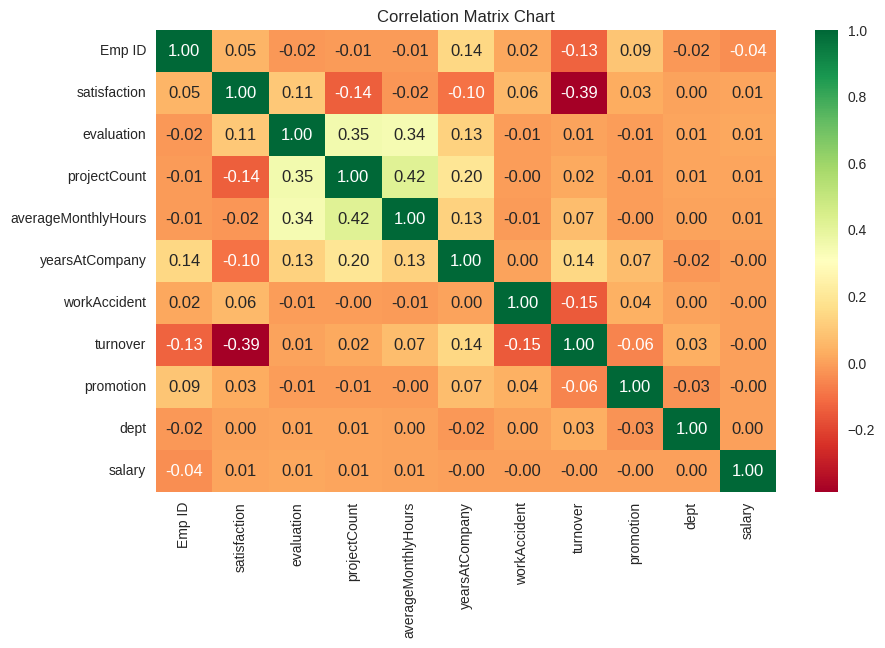

In [250]:

# @lucas
#sns.heatmap(base.corr(), annot = True, cmap = 'RdYlGn', fmt = '.2f')

# @andvsilva
plt.figure(figsize=(10, 6))
ax = plt.axes()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, 
            ax=ax, 
            fmt=".2f", 
            cmap="RdYlGn", 
            cbar=True, 
            annot = True)
ax.set_title('Correlation Matrix Chart')
plt.show()

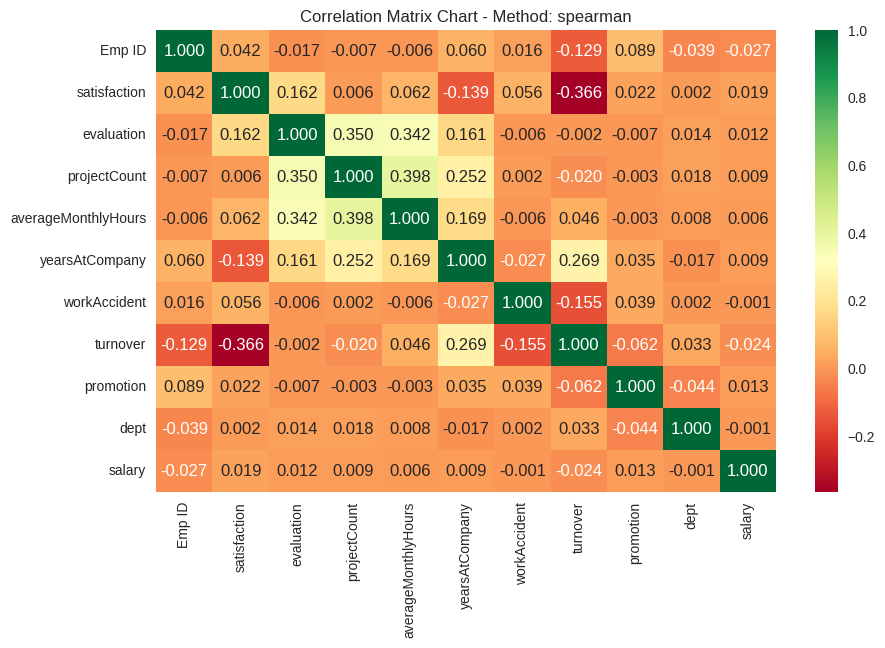

In [251]:
# @lucas
#sns.heatmap(base.corr(method='spearman'), annot = True, cmap = 'RdYlGn', fmt = '.2f')

# @andvsilva
method = 'spearman' # define method here!
corr = base.corr(method=method) # set the method.

plt.figure(figsize=(10, 6))
ax = plt.axes()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, 
            ax=ax, 
            fmt=".3f", 
            cmap="RdYlGn", 
            cbar=True, 
            annot = True)
ax.set_title(f'Correlation Matrix Chart - Method: {method}')
plt.show()

In [252]:
# @andvsilva - This can be used for Feature Selection

method = 'spearman' # define method here!
corr = base.corr(method=method) # set the method.

# Set a correlation threshold (you can adjust this based on your problem)
correlation_threshold = 0.1

# Find highly correlated features
highly_correlated_features = set()

for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > correlation_threshold:
            colname = corr.columns[i]
            highly_correlated_features.add(colname)

# Print the highly correlated features
print(f"Highly correlated features: {list(highly_correlated_features)}")

# Drop the highly correlated features from the DataFrame
#df_filtered = df.drop(columns=highly_correlated_features)

Highly correlated features: ['turnover', 'averageMonthlyHours', 'evaluation', 'yearsAtCompany', 'projectCount']


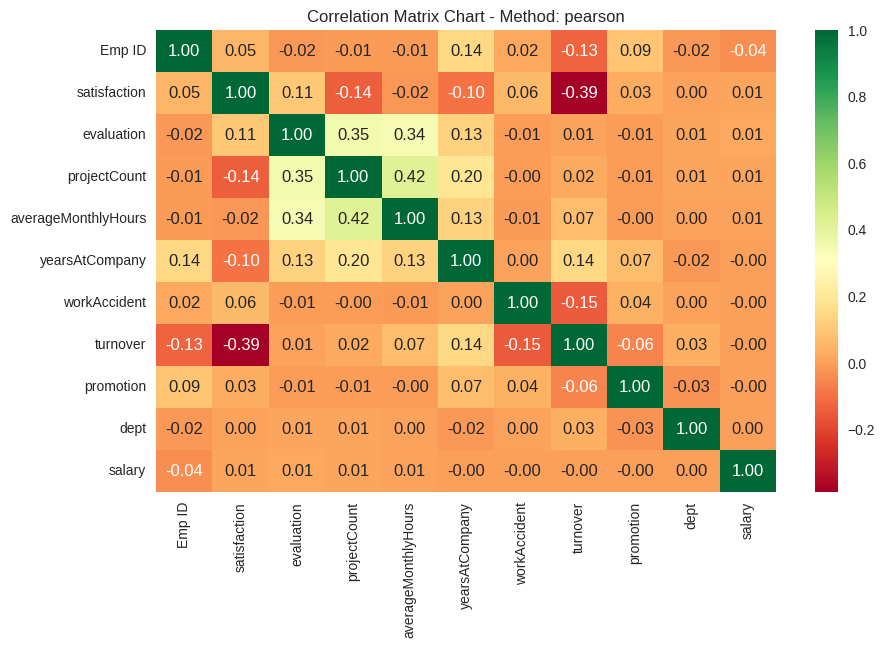

In [253]:
# @lucas
#sns.heatmap(base.corr(method='pearson'), annot = True, cmap = 'RdYlGn', fmt = '.2f')

# @andvsilva
method = 'pearson' # define method here!
corr = base.corr(method=method) # set the method.

plt.figure(figsize=(10, 6))
ax = plt.axes()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, 
            ax=ax, 
            fmt=".2f", 
            cmap="RdYlGn", 
            cbar=True, 
            annot = True)
ax.set_title(f'Correlation Matrix Chart - Method: {method}')
plt.show()

In [254]:
# @andvsilva - This can be used for Feature Selection

method = 'pearson' # define method here!
corr = base.corr(method=method) # set the method.

# Set a correlation threshold (you can adjust this based on your problem)
correlation_threshold = 0.1

# Find highly correlated features
highly_correlated_features = set()

for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > correlation_threshold:
            colname = corr.columns[i]
            highly_correlated_features.add(colname)

# Print the highly correlated features
print(f"Highly correlated features: {list(highly_correlated_features)}")

# Drop the highly correlated features from the DataFrame
#df_filtered = df.drop(columns=highly_correlated_features)

Highly correlated features: ['turnover', 'averageMonthlyHours', 'evaluation', 'yearsAtCompany', 'projectCount']


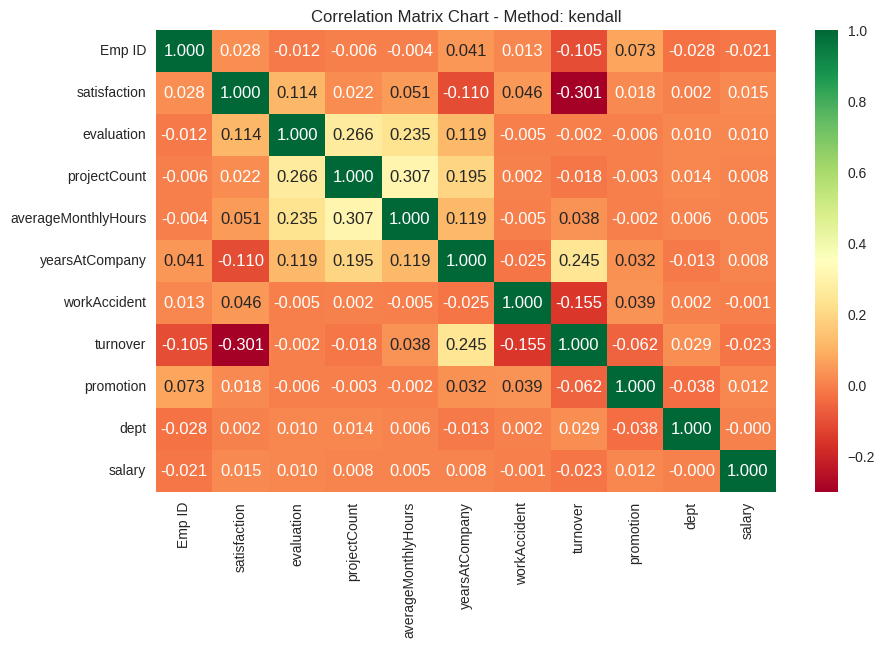

In [255]:
# @lucas
#sns.heatmap(base.corr(method='kendall'), annot = True, cmap = 'RdYlGn', fmt = '.2f')

# @andvsilva
method = 'kendall' # define method here!
corr = base.corr(method=method) # set the method.

plt.figure(figsize=(10, 6))
ax = plt.axes()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, 
            ax=ax, 
            fmt=".3f", 
            cmap="RdYlGn", 
            cbar=True, 
            annot = True)
ax.set_title(f'Correlation Matrix Chart - Method: {method}')
plt.show()

In [256]:
# @andvsilva - This can be used for Feature Selection

method = 'kendall' # define method here!
corr = base.corr(method=method) # set the method.

# Set a correlation threshold (you can adjust this based on your problem)
correlation_threshold = 0.1

# Find highly correlated features
highly_correlated_features = set()

for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > correlation_threshold:
            colname = corr.columns[i]
            highly_correlated_features.add(colname)

# Print the highly correlated features
print(f"Highly correlated features: {list(highly_correlated_features)}")

# Drop the highly correlated features from the DataFrame
#df_filtered = df.drop(columns=highly_correlated_features)

Highly correlated features: ['turnover', 'averageMonthlyHours', 'evaluation', 'yearsAtCompany', 'projectCount']


DataFrame.corr(method='pearson', min_periods=1, numeric_only=False)[source]
Compute pairwise correlation of columns, excluding NA/null values.

Parameters:
method{‘pearson’, ‘kendall’, ‘spearman’} or callable
Method of correlation:

pearson : standard correlation coefficient

kendall : Kendall Tau correlation coefficient

spearman : Spearman rank correlation

callable: callable with input two 1d ndarrays
and returning a float. Note that the returned matrix from corr will have 1 along the diagonals and will be symmetric regardless of the callable’s behavior.

min_periodsint, optional
Minimum number of observations required per pair of columns to have a valid result. Currently only available for Pearson and Spearman correlation.

numeric_onlybool, default False
Include only float, int or boolean data.

In [257]:
#PANDAS PROFILE
import pandas as pd
from pandas_profiling import ProfileReport
#base = pd.read_excel('HR_COM1.xlsx', sheet_name = 'HR_COM1_Trat')
profile = ProfileReport(base, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [258]:
#Para gerar em html
profile.to_file("analise_RH.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

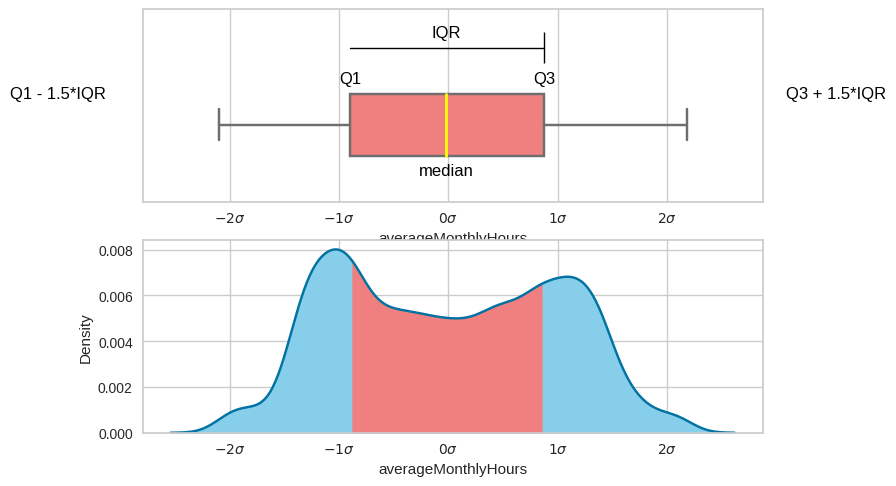

In [259]:
#VERIFICAR BIBLIOTECA @lucas

# toolkit.py esta na pasta explore github
import toolkit as tool # adicionar o arquivo toolkit.py na mesma pasta que o arquivo Dados RH.ipynb

# To look for outliers. Boxplots is an option
data = base['averageMonthlyHours']
tool.plot_hist(data)

In [260]:
columns_boxplot = ['satisfaction', 'evaluation', 'projectCount'
                   ,'yearsAtCompany', 'workAccident', 'turnover',
       'promotion']

employee_data = base[columns_boxplot]

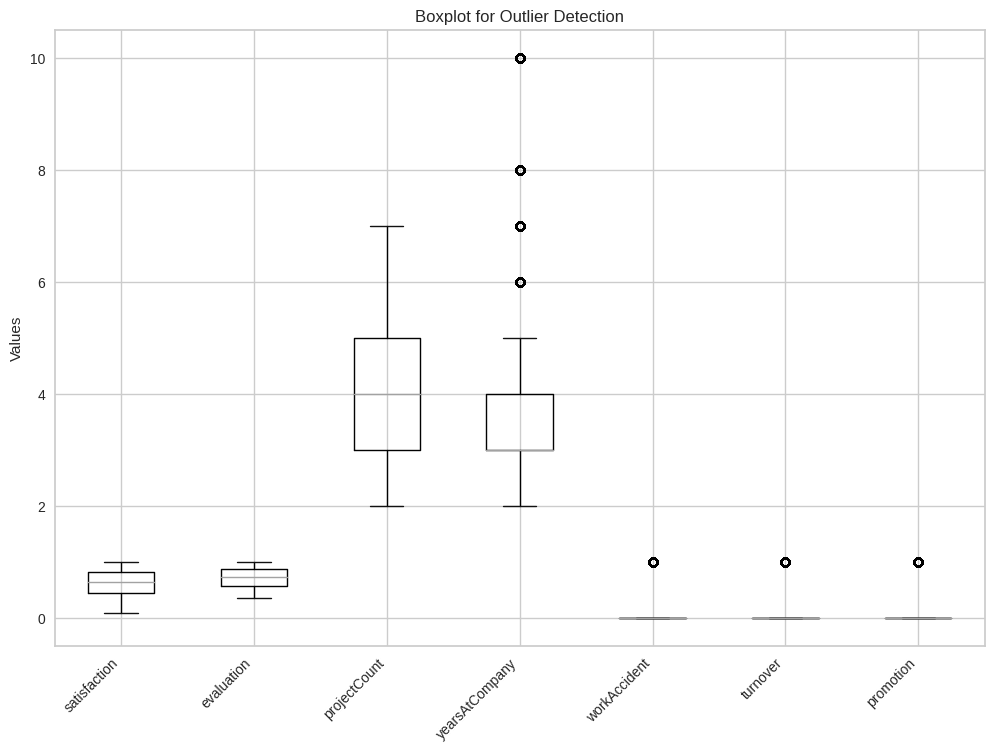

In [261]:
# @andvsilva
# Create a boxplot for each column in the DataFrame
plt.figure(figsize=(12, 8))
employee_data.boxplot()
plt.title('Boxplot for Outlier Detection')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.ylabel('Values')
plt.show()

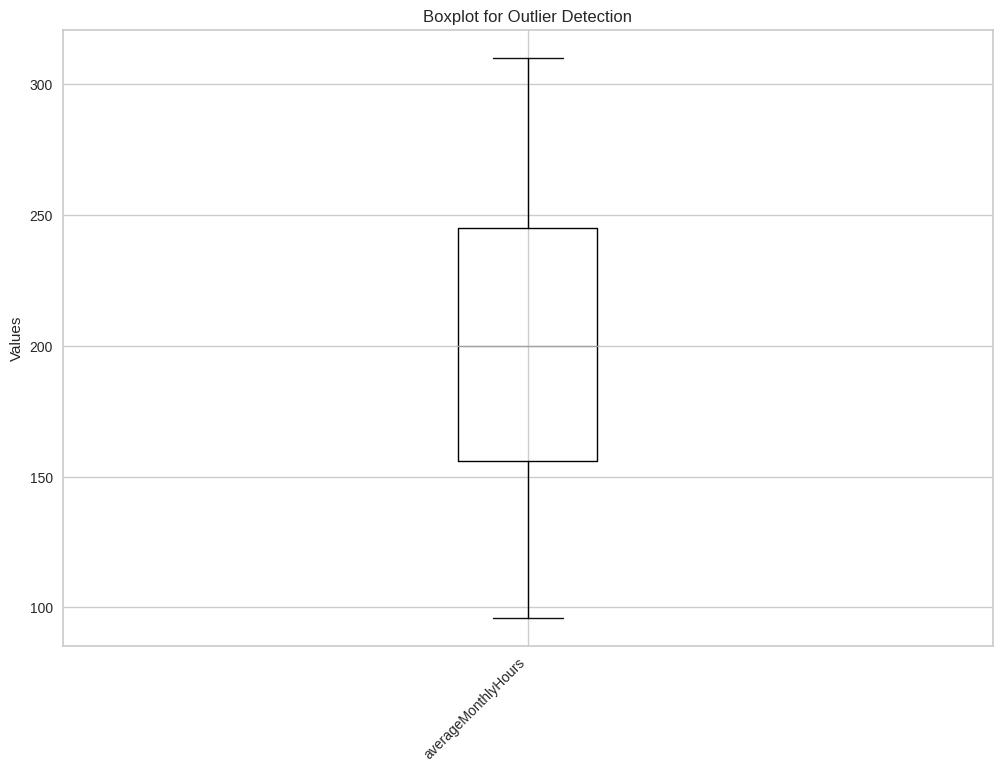

In [262]:
# @andvsilva
# Create a boxplot for each column in the DataFrame
fig = plt.figure(figsize=(12, 8))
ax = fig.gca()

base.boxplot(column='averageMonthlyHours', ax =ax)
plt.title('Boxplot for Outlier Detection')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.ylabel('Values')
plt.show()

In [263]:
base

Emp ID  satisfaction  evaluation  projectCount  averageMonthlyHours  \
0          1.0          0.38        0.53           2.0                157.0   
1          2.0          0.80        0.86           5.0                262.0   
2          3.0          0.11        0.88           7.0                272.0   
3          4.0          0.72        0.87           5.0                223.0   
4          5.0          0.37        0.52           2.0                159.0   
...        ...           ...         ...           ...                  ...   
14994  14207.0          0.90        0.55           3.0                259.0   
14995  14208.0          0.74        0.95           5.0                266.0   
14996  14209.0          0.85        0.54           3.0                185.0   
14997  14210.0          0.33        0.65           3.0                172.0   
14998  14211.0          0.50        0.73           4.0                180.0   

       yearsAtCompany  workAccident  turnover  promotion  dept  salary  
0                   3           0.0         1        0.0     7       1  
1                   6           0.0         1        0.0     7       2  
2                   4           0.0         1        0.0     7       2  
3                   5           0.0         1        0.0     7       1  
4                   3           0.0         1        0.0     7       1  
...               ...           ...       ...        ...   ...     ...  
14994              10           1.0         0        1.0     4       0  
14995              10           0.0         0        1.0     4       0  
14996              10           0.0         0        1.0     4       0  
14997              10           0.0         0        1.0     5       0  
14998               3           0.0         0        0.0     0       1  

[14999 rows x 11 columns]

In [264]:
# @lucas
#base.plot(kind='bar',x='left',y='time_spend_company',figsize=(14,8))

# @andsilva
# Use GroupBy() & compute sum on specific column
base_test = base.groupby('turnover')['yearsAtCompany'].sum()
print("Get sum of the grouped data:\n", base_test)

Get sum of the grouped data:
 turnover
0    38627
1    13843
Name: yearsAtCompany, dtype: int64


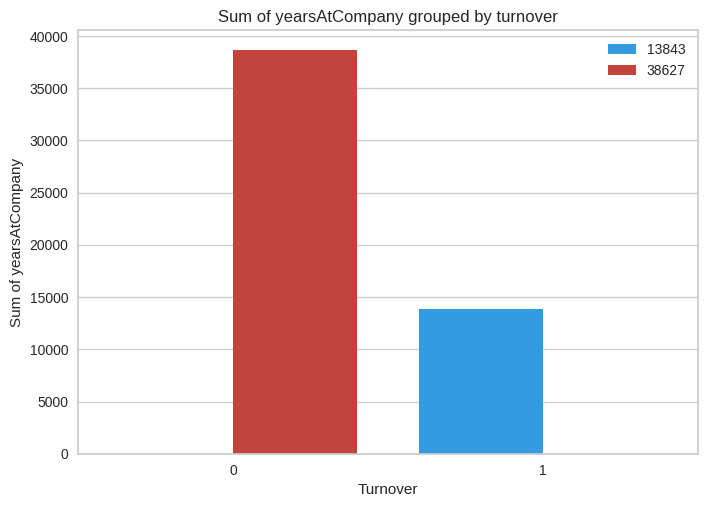

In [265]:
# Plotting using Seaborn
palette = ["#179fff", "#d73027"]

sns.barplot(x=base_test.index, y=base_test.values, hue=base_test.values, palette=palette)
plt.title('Sum of yearsAtCompany grouped by turnover')
plt.xlabel('Turnover')
plt.ylabel('Sum of yearsAtCompany')
plt.show()

# <span style='background :green' > Preparando para o modelo

In [266]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Emp ID               14999 non-null  float64
 1   satisfaction         14999 non-null  float64
 2   evaluation           14999 non-null  float64
 3   projectCount         14999 non-null  float64
 4   averageMonthlyHours  14999 non-null  float64
 5   yearsAtCompany       14999 non-null  int64  
 6   workAccident         14999 non-null  float64
 7   turnover             14999 non-null  int64  
 8   promotion            14999 non-null  float64
 9   dept                 14999 non-null  int64  
 10  salary               14999 non-null  int64  
dtypes: float64(7), int64(4)
memory usage: 1.3 MB


In [267]:
# @lucas now you can delete this cell :)

#base.dept = base.dept.astype('category')
#base.salary = base.salary.astype('category')

In [268]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Emp ID               14999 non-null  float64
 1   satisfaction         14999 non-null  float64
 2   evaluation           14999 non-null  float64
 3   projectCount         14999 non-null  float64
 4   averageMonthlyHours  14999 non-null  float64
 5   yearsAtCompany       14999 non-null  int64  
 6   workAccident         14999 non-null  float64
 7   turnover             14999 non-null  int64  
 8   promotion            14999 non-null  float64
 9   dept                 14999 non-null  int64  
 10  salary               14999 non-null  int64  
dtypes: float64(7), int64(4)
memory usage: 1.3 MB


In [269]:
x_column_names = list(base.columns)
x_column_names.remove('turnover')
x_column_names.remove('Emp ID')
x_column_names

['satisfaction',
 'evaluation',
 'projectCount',
 'averageMonthlyHours',
 'yearsAtCompany',
 'workAccident',
 'promotion',
 'dept',
 'salary']

In [270]:
# @ andvsilva
X = base.drop(columns=['turnover', 'Emp ID'])
y = base.turnover

In [271]:
# Split the data to train and test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, shuffle=True)

In [272]:
# @andvsilva
# list train and test size:

print('info size train and test data:')
print(f'X train.....: {X_train.shape}')
print(f'X test......: {X_test.shape}')
print(f'y train.....: {y_train.shape}')
print(f'y test......: {y_test.shape}')

info size train and test data:
X train.....: (11999, 9)
X test......: (3000, 9)
y train.....: (11999,)
y test......: (3000,)


# <span style='background :green' > Regressão Logística

In [273]:
# @ lucas, you can delete this cell, because I already did above.
# from sklearn.model_selection import train_test_split
# X_train_LogReg, X_test_LogReg, y_train_LogReg, y_test_LogReg = train_test_split(X, y, test_size=0.2, random_state=123)


In [274]:

# @lucas 
#Criando o modelo
#LogReg_model = LogisticRegression() 

#Treinando o modelo
#LogReg_model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
#y_pred_LogReg = LogReg_model.predict(X_test)


# @andsilva - just argument to 'random_state=0, max_iter=1000'
#Criando o modelo
LogReg_model = LogisticRegression(random_state=0, max_iter=1000) 

#Treinando o modelo
LogReg_model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred_LogReg = LogReg_model.predict(X_test)

In [275]:
#ACCURACY, RECALL, PRECISION

#AC_LogReg = metrics.accuracy_score(y_test_LogReg, y_pred_LogReg)
#RE_LogReg = metrics.recall_score(y_test_LogReg, y_pred_LogReg)
#PRE_LogReg = metrics.precision_score(y_test_LogReg, y_pred_LogReg)

AC_LogReg = metrics.accuracy_score(y_test, y_pred_LogReg)
RE_LogReg = metrics.recall_score(y_test, y_pred_LogReg)
PRE_LogReg = metrics.precision_score(y_test, y_pred_LogReg)

print(f'Accuracy:.............: {AC_LogReg:.2%}')
print(f'Recall:...............: {RE_LogReg:.2%}')
print(f'Precision:............: {PRE_LogReg:.2%}')

#DUAS FORMAS DIFERENTES DE FORMATAR PERCENTUAL

Accuracy:.............: 77.23%
Recall:...............: 24.42%
Precision:............: 51.37%


In [276]:
#MATRIZ DE CONFUSAO
confusion_matrix(y_test, y_pred_LogReg)

array([[2148,  160],
       [ 523,  169]])

In [277]:
# function to make the plot.
def plot_conf_matrix(y_test, y_pred, model_name):
    confusion_matrix1 = confusion_matrix(y_test, y_pred)
    display = ConfusionMatrixDisplay(confusion_matrix1).plot()
    plt.title(f"Confusion Matrix: {model_name}")
    plt.grid(False)
    plt.show()

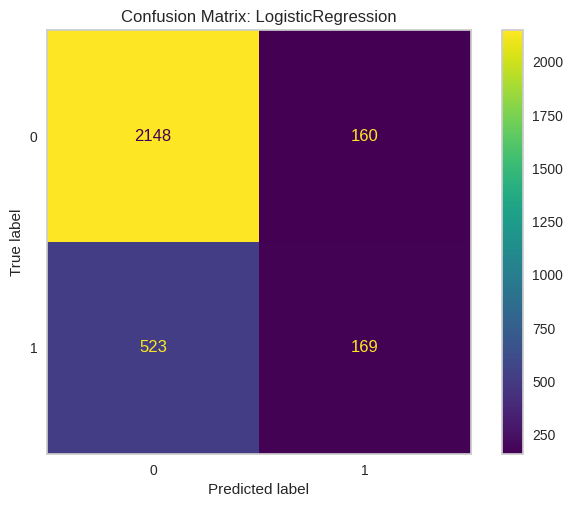

In [278]:
#plot_confusion_matrix(LogReg_model, X_test, y_test)

# @andvsilva
plot_conf_matrix(y_test, y_pred_LogReg, 'LogisticRegression')

In [279]:
#Feature Importance
#plot_model(LogReg_model, plot = 'feature')

# @andsilva 
# Warning - 'LogisticRegression' object has no attribute 'feature_importances_'

In [280]:
#IMPORTAR OS RESULTADOS DE PREDIÇÃO PARA A RELAÇÃO ORIGINAL PARA COMPARAR

In [281]:
# Criando um DataFrame com as previsões e os resultados reais
comparison_df = pd.DataFrame({'Real': y_test, 'Previsto': y_pred_LogReg})
comparison_df

Real  Previsto
6958      0         0
7534      0         0
2975      1         0
3903      0         0
8437      0         0
...     ...       ...
1229      1         0
10593     0         0
12248     0         0
3147      1         0
6623      0         0

[3000 rows x 2 columns]

In [282]:
comparison_df.shape

(3000, 2)

In [283]:
# Adicionando as previsões como uma nova feature

#data_test_with_predictions = pd.base(np.c_[X_test, y_pred], columns=['X_test'] + ['y_pred'])


In [284]:
#plot_model(br_model, plot = 'feature')

# <span style='background :green' > XGBoost

In [285]:
# @lucas - delete this cell, we already did!
#X_train_XGB, X_test_XGB, y_train_XGB, y_test_XGB = train_test_split(X, y, test_size=0.2, random_state=123)

In [286]:
# Criando o modelo XGBoost
XGB_model = xgb.XGBClassifier()

# Treinando o modelo
XGB_model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred_XGB = XGB_model.predict(X_test)

In [287]:
#ACCURACY, RECALL, PRECISION

# @lucas
#AC_XGB = metrics.accuracy_score(y_test_XGB, y_pred_XGB)
#RE_XGB = metrics.recall_score(y_test_XGB, y_pred_XGB)
#PRE_XGB = metrics.precision_score(y_test_XGB, y_pred_XGB)

# @andvsilva
AC_XGB = metrics.accuracy_score(y_test, y_pred_XGB)
RE_XGB = metrics.recall_score(y_test, y_pred_XGB)
PRE_XGB = metrics.precision_score(y_test, y_pred_XGB)

print(f'Accuracy:.............: {AC_XGB:.2%}')
print(f'Recall:...............: {RE_XGB:.2%}')
print(f'Precision:............: {PRE_LogReg:.2%}')

#DUAS FORMAS DIFERENTES DE FORMATAR PERCENTUAL

Accuracy:.............: 99.20%
Recall:...............: 97.40%
Precision:............: 51.37%


In [288]:
# @andvsilva - Feature Importance.
feature_names = []  # list
feature_importances = {} #dict

print('Feature Importance:')
for feature_name, importance in zip(x_column_names, XGB_model.feature_importances_):
    importance = importance = round(importance*100, 2)
    print(f'{feature_name}...............: {importance}%')
    feature_names.append(feature_name)
    feature_importances[feature_name] = importance


Feature Importance:
satisfaction...............: 30.83%
evaluation...............: 9.86%
projectCount...............: 15.02%
averageMonthlyHours...............: 5.22%
yearsAtCompany...............: 25.94%
workAccident...............: 6.15%
promotion...............: 1.95%
dept...............: 1.86%
salary...............: 3.17%


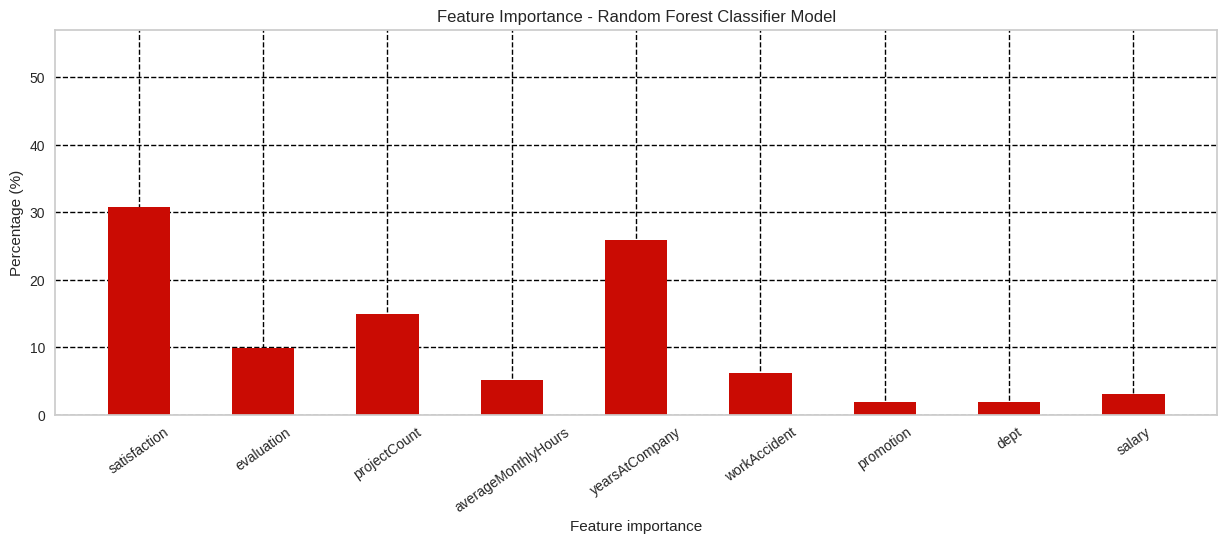

In [289]:
# feature importance
plt.figure(figsize=(15,5))
plt.bar(feature_importances.keys(),feature_importances.values(), width=.5, color='r')
plt.ylim(0,57)
plt.title("Feature Importance - Random Forest Classifier Model")
plt.ylabel("Percentage (%)")
plt.xlabel("Feature importance")
plt.xticks(rotation=35)
plt.grid(color='black', linestyle='dashed')
plt.show()

In [290]:
#MATRIZ DE CONFUSAO
confusion_matrix(y_test, y_pred_XGB)

array([[2302,    6],
       [  18,  674]])

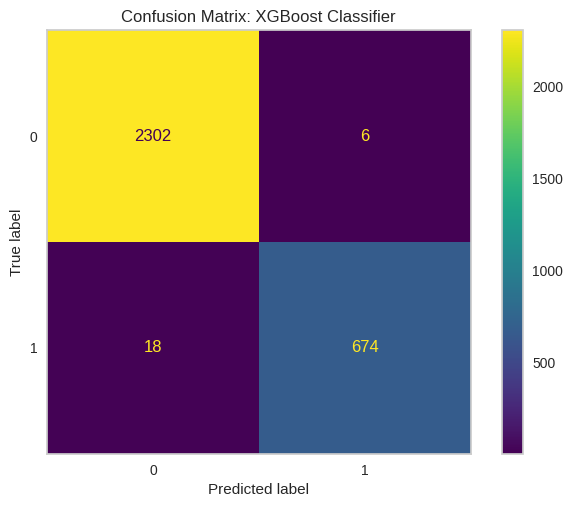

In [291]:
# @andvsilva
plot_conf_matrix(y_test, y_pred_XGB, 'XGBoost Classifier')

In [292]:
# delete the next cell, please. 



# Se a parte de cima não rodar, usar todo esse código

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
plot_confusion_matrix(XGB_model, X_test_XGB, y_test_XGB)  
plt.show()

# <span style='background :green' > Random Forest

In [293]:
# @ lucas, delete this cell, repeated
#from sklearn.model_selection import train_test_split
#X_train_RF, X_test_RF, y_train_RF, y_test_RF = train_test_split(X, y, test_size=0.2, random_state=123)

In [294]:
#Criando o modelo Random Forest
RF_model = RandomForestClassifier()

# Treinando o modelo
RF_model.fit(X_train, y_train)

# Faça previsões no conjunto de teste
y_pred_RF = RF_model.predict(X_test)

In [295]:
#ACCURACY, RECALL, PRECISION

# @lucas
#AC_RF = metrics.accuracy_score(y_test_RF, y_pred_RF)
#RE_RF = metrics.recall_score(y_test_RF, y_pred_RF)
#PRE_RF = metrics.precision_score(y_test_RF, y_pred_RF)

# @andvsilva
AC_RF = metrics.accuracy_score(y_test, y_pred_RF)
RE_RF = metrics.recall_score(y_test, y_pred_RF)
PRE_RF = metrics.precision_score(y_test, y_pred_RF)

print(f'Accuracy:.............: {AC_RF:.2%}')
print(f'Recall:...............: {RE_RF:.2%}')
print(f'Precision:............: {PRE_RF:.2%}')

#DUAS FORMAS DIFERENTES DE FORMATAR PERCENTUAL

Accuracy:.............: 99.37%
Recall:...............: 97.69%
Precision:............: 99.56%


In [296]:
#MATRIZ DE CONFUSAO
confusion_matrix(y_test, y_pred_RF)

array([[2305,    3],
       [  16,  676]])

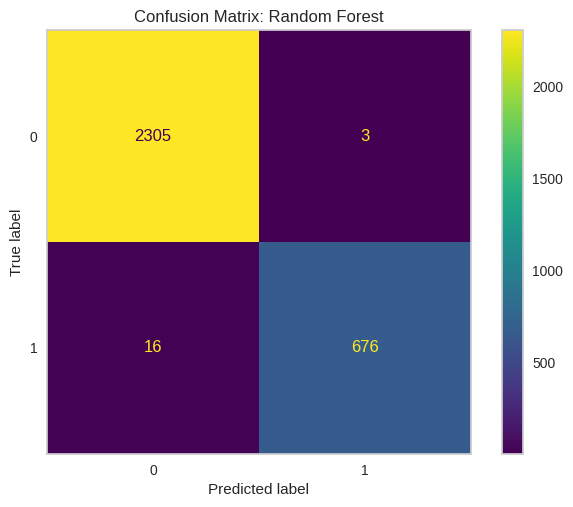

In [297]:
#MATRIZ DE CONFUSAO

# @lucas
#import matplotlib.pyplot as plt
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(RF_model, X_test_RF, y_test_RF);


# @andvsilva
plot_conf_matrix(y_test, y_pred_RF, 'Random Forest')

In [298]:
# @andvsilva - Feature Importance.
feature_names = []  # list
feature_importances = {} #dict

print('Feature Importance:')
for feature_name, importance in zip(x_column_names, RF_model.feature_importances_):
    importance = importance = round(importance*100, 2)
    print(f'{feature_name}...............: {importance}%')
    feature_names.append(feature_name)
    feature_importances[feature_name] = importance

Feature Importance:
satisfaction...............: 34.43%
evaluation...............: 11.74%
projectCount...............: 18.16%
averageMonthlyHours...............: 14.49%
yearsAtCompany...............: 18.37%
workAccident...............: 0.55%
promotion...............: 0.1%
dept...............: 1.32%
salary...............: 0.84%


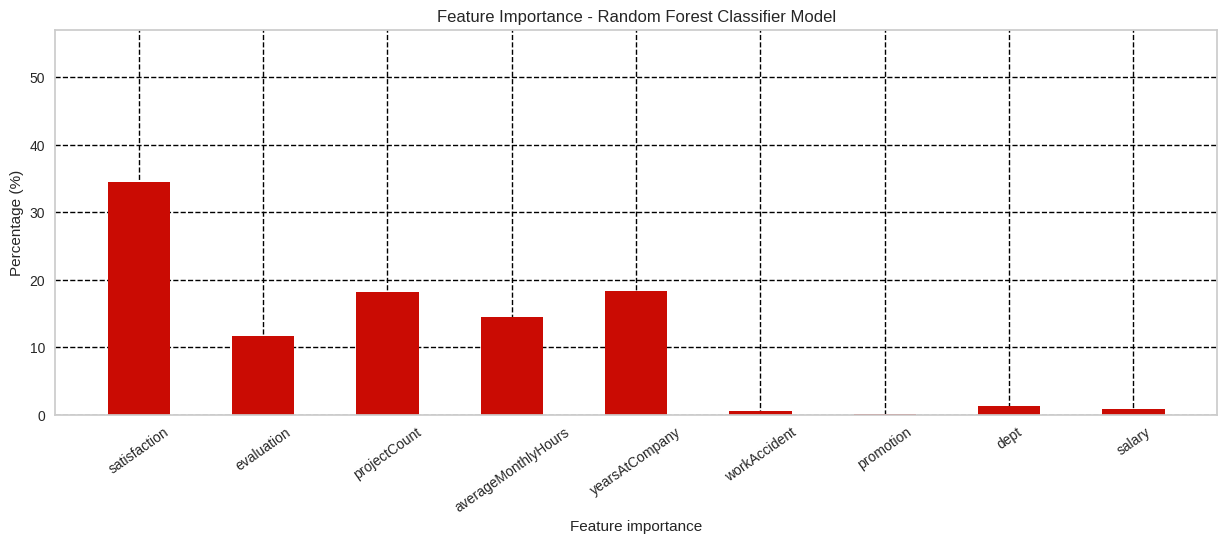

In [299]:
# feature importance
plt.figure(figsize=(15,5))
plt.bar(feature_importances.keys(),feature_importances.values(), width=.5, color='r')
plt.ylim(0,57)
plt.title("Feature Importance - Random Forest Classifier Model")
plt.ylabel("Percentage (%)")
plt.xlabel("Feature importance")
plt.xticks(rotation=35)
plt.grid(color='black', linestyle='dashed')
plt.show()

# <span style='background :yellow' > Regressão Linear (apenas teste para estudo estatístico)

In [300]:
# @lucas
# Gerar dados de exemplo
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Adicionar uma coluna de 1s para representar o termo de interceptação
X_b = sm.add_constant(X)

# Criar um modelo de regressão linear
model = sm.OLS(y, X_b)

# Treinar o modelo
results = model.fit()

# Exibir um resumo do modelo
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     326.7
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           5.66e-33
Time:                        12:39:43   Log-Likelihood:                -131.15
No. Observations:                 100   AIC:                             266.3
Df Residuals:                      98   BIC:                             271.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2151      0.170     24.753      0.0

In [301]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     326.7
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           5.66e-33
Time:                        12:39:43   Log-Likelihood:                -131.15
No. Observations:                 100   AIC:                             266.3
Df Residuals:                      98   BIC:                             271.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2151      0.170     24.753      0.000       3.877       4.553
x1             2.7701      0.153     18.076      0.000       2.466       3.074
==============================================================================
Omnibus:                        0.900   Durbin-Watson:                   2.285
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.808
Skew:                           0.217   Prob(JB):                        0.668
Kurtosis:                       2.929   Cond. No.                         3.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# <span style='background :yellow' > PYCARET

C:\Users\lucas\Meu Drive\Pós graduação\202208 Augmented Analytics\Materiais de todas as aulas

In [302]:
from pycaret.utils import version

In [303]:
#base1 = base.drop(columns=['Emp ID', 'dept', 'salary'])

In [304]:
base

Emp ID  satisfaction  evaluation  projectCount  averageMonthlyHours  \
0          1.0          0.38        0.53           2.0                157.0   
1          2.0          0.80        0.86           5.0                262.0   
2          3.0          0.11        0.88           7.0                272.0   
3          4.0          0.72        0.87           5.0                223.0   
4          5.0          0.37        0.52           2.0                159.0   
...        ...           ...         ...           ...                  ...   
14994  14207.0          0.90        0.55           3.0                259.0   
14995  14208.0          0.74        0.95           5.0                266.0   
14996  14209.0          0.85        0.54           3.0                185.0   
14997  14210.0          0.33        0.65           3.0                172.0   
14998  14211.0          0.50        0.73           4.0                180.0   

       yearsAtCompany  workAccident  turnover  promotion  dept  salary  
0                   3           0.0         1        0.0     7       1  
1                   6           0.0         1        0.0     7       2  
2                   4           0.0         1        0.0     7       2  
3                   5           0.0         1        0.0     7       1  
4                   3           0.0         1        0.0     7       1  
...               ...           ...       ...        ...   ...     ...  
14994              10           1.0         0        1.0     4       0  
14995              10           0.0         0        1.0     4       0  
14996              10           0.0         0        1.0     4       0  
14997              10           0.0         0        1.0     5       0  
14998               3           0.0         0        0.0     0       1  

[14999 rows x 11 columns]

In [305]:
#inicializar o ambiente
from pycaret.classification import *
clf1 = setup(base, target = 'turnover', session_id=357, log_experiment=True, experiment_name='base_estudo')

In [306]:
exp1 = setup(base, target='turnover', session_id=123)

In [307]:
#compare os algoritmos 
best_model = compare_models()

Initiated  . . . . . . . . . . . . . . . . . .             12:39:45
Status     . . . . . . . . . . . . . . . . . .    Loading Estimator
Estimator  . . . . . . . . . . . . . . . . . .  Logistic Regression

In [308]:
# Done @andvsilva - Now you can ALL the notebook without ERROR!